# 흡연여부, 음주여부에 따른 질병여부 비교

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# altair 라이브러리 사용
!pip install altair
import altair as alt

plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

In [2]:
검진정보 = pd.read_csv(
    "./검진정보.csv",
)
심장질환 = pd.read_csv(
    "./심장질환.csv"
)

# 음주여부에 따른 흡연자 비율

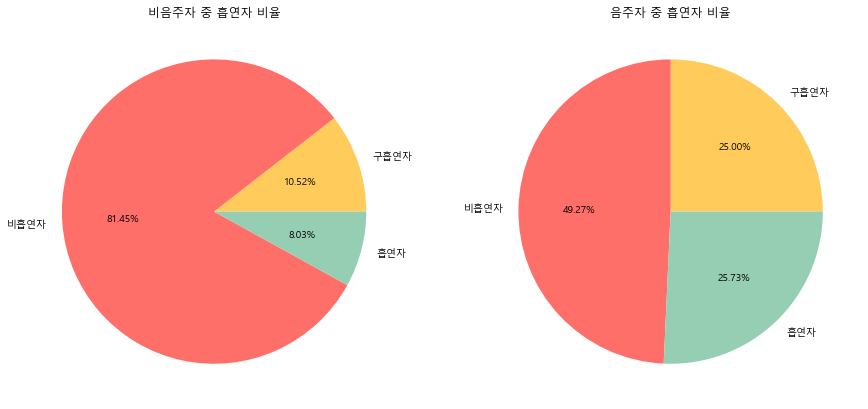

In [14]:
df = 검진정보.groupby(["음주여부","흡연상태"])[["기준년도"]].count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"]

n = len(df['음주여부'].unique())
j = 1
plt.figure(figsize = (15,30))

for i in ([ "비음주자", "음주자"]):
    plt.subplot(n,2,j)
    df1 = df[df['음주여부']==i]
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['흡연상태'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)
    plt.title(i+' 중 흡연자 비율')
    j += 1

plt.show()

# 흡연여부에 따른 질병여부 비교

In [3]:
#흡연상태 변환
def 흡연_변환(x):
    x=x['흡연상태']
    if x==1:
        return "비흡연자"
    elif x==2:
        return "구흡연자"
    elif x==3:
        return "흡연자"

검진정보["흡연상태"] = 검진정보.apply(흡연_변환,axis=1)

## 흡연여부에 따른 간질환 비율

- 흡연을 통해 몸에 흡수된 발암물질의 대부분은 간에서 대사되기 때문에 간에 나쁜 영향을 줌<br>
  -> 흡연으로 인한 간암 위험이 증가

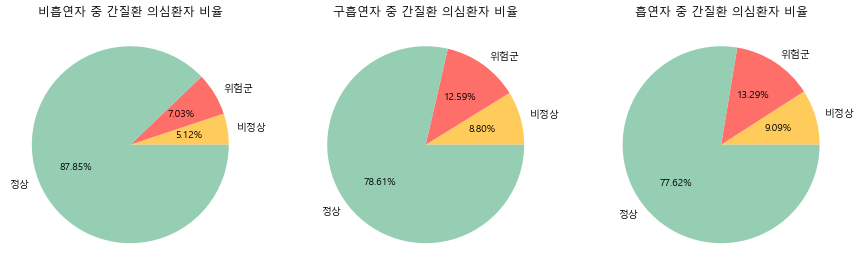

In [5]:
df = 검진정보.groupby(["흡연상태","간질환"])[["기준년도"]].count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 

n = len(df['흡연상태'].unique())
j = 1
plt.figure(figsize = (15,30))

for i in (["비흡연자", "구흡연자", "흡연자"]):
    plt.subplot(n,3,j)
    df1 = df[df['흡연상태']==i]
    df1 = df1.groupby(['간질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['간질환'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)    
    plt.title(i+' 중 간질환 의심환자 비율')
    j += 1

plt.show()

## 흡연여부에 따른 비만 비율

- 금연 시 스트레스와 금단현상으로 인한 체중 증가<br>
  -> 금연은 비만도와 양의 상관관계

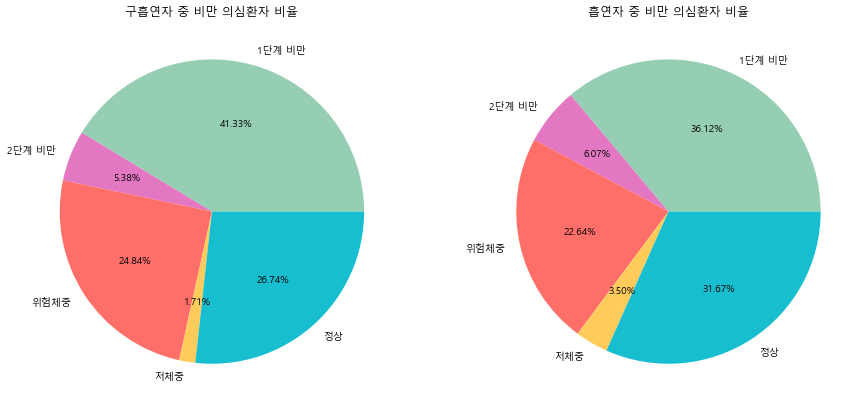

In [7]:
df = 검진정보.groupby(["흡연상태","비만정도"])[["기준년도"]].count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 

n = len(df['흡연상태'].unique())
j = 1
plt.figure(figsize = (15,30))

for i in (["구흡연자", "흡연자"]):
    plt.subplot(n,2,j)
    df1 = df[df['흡연상태']==i]
    df1 = df1.groupby(['비만정도'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['비만정도'].values
    color = ['#96ceb4', '#e377c2','#ff6f69', '#ffcc5c','#17becf']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)    
    plt.title(i+' 중 비만 의심환자 비율')
    j += 1

plt.show()

## 흡연여부에 따른 당뇨병 비율

- 흡연 시 뇌의 신호 전달 경로에 영향을 미쳐 당뇨병 일으킴<br>
  -> 인슐린 조절이 어려워짐

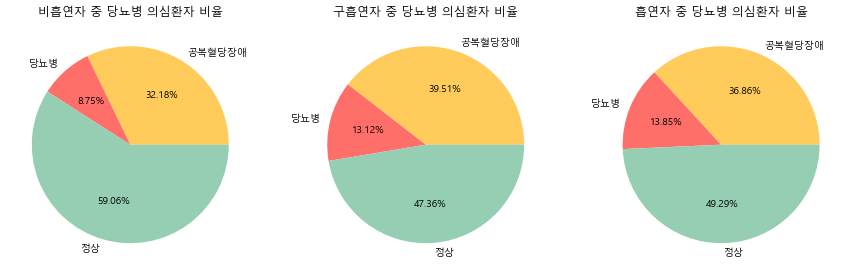

In [8]:
df = 검진정보.groupby(["흡연상태","당뇨"])[["기준년도"]].count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 

n = len(df['흡연상태'].unique())
j = 1
plt.figure(figsize = (15,30))

for i in (["비흡연자", "구흡연자", "흡연자"]):
    plt.subplot(n,3,j)
    df1 = df[df['흡연상태']==i]
    df1 = df1.groupby(['당뇨'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['당뇨'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)    
    plt.title(i+' 중 당뇨병 의심환자 비율')
    j += 1

plt.show()

# 음주여부에 따른 질병여부 비교

In [9]:
#음주여부 변환
def 음주_변환(x):
    x=x['음주여부']
    if x==1:
        return "음주자"
    elif x==0:
        return "비음주자"

검진정보["음주여부"] = 검진정보.apply(음주_변환,axis=1)

## 음주여부에 따른 간질환 비율

- 잦은 음주는 간세포에 지방을 축적시키고 간세포를 손상시킴<br>
  -> 음주자의 경우 비음주자에 비해 간질환 발병률이 높아짐


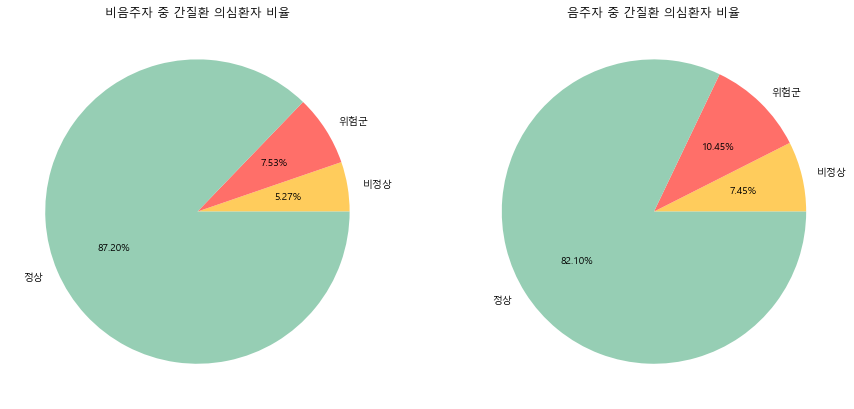

In [10]:
df = 검진정보.groupby(["음주여부","간질환"])[["기준년도"]].count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 

n = len(df['음주여부'].unique())
j = 1
plt.figure(figsize = (15,30))

for i in ([ "비음주자", "음주자"]):
    plt.subplot(n,2,j)
    df1 = df[df['음주여부']==i]
    df1 = df1.groupby(['간질환'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['간질환'].values
    color = ['#ffcc5c','#ff6f69', '#96ceb4']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)    
    plt.title(i+' 중 간질환 의심환자 비율')
    j += 1

plt.show()

## 음주여부에 따른 비만 비율

- 잦은 음주는 간세포에 지방을 축적시킴<br>
  -> 음주자의 경우 비음주자에 비해 비만 발병률이 높아짐


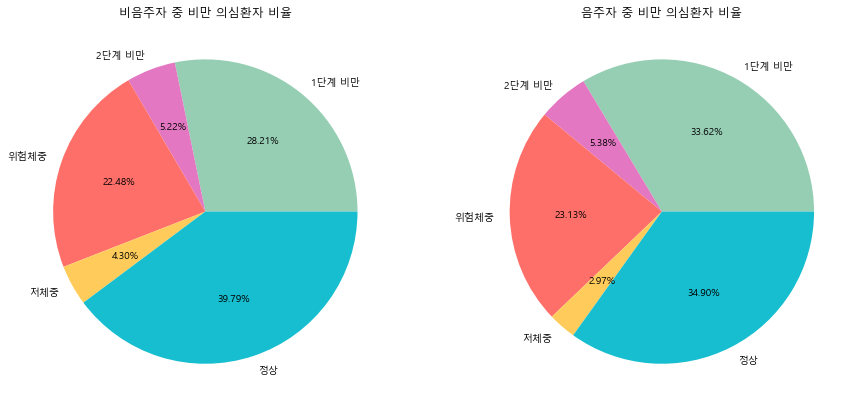

In [15]:
df = 검진정보.groupby(["음주여부","비만정도"])[["기준년도"]].count()
df.reset_index(inplace=True)
df["사람수"]=df["기준년도"] 

n = len(df['음주여부'].unique())
j = 1
plt.figure(figsize = (15,30))

for i in ([ "비음주자", "음주자"]):
    plt.subplot(n,2,j)
    df1 = df[df['음주여부']==i]
    df1 = df1.groupby(['비만정도'])[['사람수']].sum()
    df1.reset_index(inplace=True)
    x = df1['사람수'].values
    labels = df1['비만정도'].values
    color = ['#96ceb4', '#e377c2','#ff6f69', '#ffcc5c','#17becf']
    plt.pie(x,labels=labels, autopct='%.2f%%', colors = color)    
    plt.title(i+' 중 비만 의심환자 비율')
    j += 1

plt.show()